2025-06-08 17:17:21.626573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749403041.919240      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749403042.002747      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Loading PNEUMONIA: 100%|██████████| 390/390 [00:04<00:00, 82.95it/s]


✅ Data shapes: Train=(5216, 16384), Val=(16, 16384), Test=(624, 16384)
✅ PCA reduced to 629 features


2025-06-08 17:20:20.569434: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         645,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,342,465 (5.12 MB)

 Trainable params: 1,342,465 (5.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
82/82 - 5s - 66ms/step - accuracy: 0.9139 - loss: 0.2324 - val_accuracy: 0.6875 - val_loss: 1.2732
Epoch 2/10
82/82 - 1s - 16ms/step - accuracy: 0.9707 - loss: 0.0915 - val_accuracy: 0.6875 - val_loss: 1.1880
Epoch 3/10
82/82 - 1s - 16ms/step - accuracy: 0.9758 - loss: 0.0657 - val_accuracy: 0.6875 - val_loss: 0.6745
Epoch 4/10
82/82 - 1s - 17ms/step - accuracy: 0.9877 - loss: 0.0375 - val_accuracy: 0.8750 - val_loss: 0.3544
Epoch 5/10
82/82 - 2s - 19ms/step - accuracy: 0.9908 - loss: 0.0260 - val_accuracy: 0.6875 - val_loss: 0.8782
Epoch 6/10
82/82 - 1s - 17ms/step - accuracy: 0.9939 - loss: 0.0170 - val_accuracy: 0.8750 - val_loss: 0.3444
Epoch 7/10
82/82 - 1s - 16ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.8125 - val_loss: 0.7050
Epoch 8/10
82/82 - 1s - 16ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.7500 - val_loss: 0.9178
Epoch 9/10
82/82 - 1s - 16ms/step - accuracy: 0.9967 - loss: 0.0096 - val_accuracy: 0.6875 - val_loss: 2.0155
Epoch 10/1

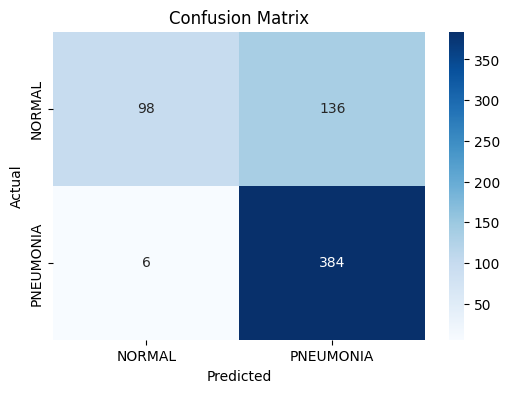

In [1]:
#MLP-Kaggle
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Configuration ---
IMG_SIZE = (128, 128)
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'
SEED = 42

# --- Helper to load and preprocess images ---
def load_images(folder):
    images, labels = [], []
    for label_name in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(folder, label_name)
        label = 0 if label_name == 'NORMAL' else 1
        for file in tqdm(os.listdir(path), desc=f"Loading {label_name}"):
            try:
                img_path = os.path.join(path, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, IMG_SIZE)
                img = img.astype(np.float32) / 255.0
                images.append(img.flatten())
                labels.append(label)
            except:
                continue
    return np.array(images), np.array(labels)

# --- Load data ---
X_train, y_train = load_images(os.path.join(DATA_DIR, 'train'))
X_val, y_val = load_images(os.path.join(DATA_DIR, 'val'))
X_test, y_test = load_images(os.path.join(DATA_DIR, 'test'))

print(f"✅ Data shapes: Train={X_train.shape}, Val={X_val.shape}, Test={X_test.shape}")

# --- Standardize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Apply PCA ---
pca = PCA(n_components=0.95, random_state=SEED)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"✅ PCA reduced to {X_train_pca.shape[1]} features")

# --- MLP Model ---
model = models.Sequential([
    layers.Input(shape=(X_train_pca.shape[1],)),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --- Train ---
history = model.fit(
    X_train_pca, y_train,
    validation_data=(X_val_pca, y_val),
    epochs=10,
    batch_size=64,
    verbose=2
)

# --- Predict & Evaluate ---
y_pred_prob = model.predict(X_test_pca).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NORMAL', 'PNEUMONIA'],
            yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


📦 Loading images...


100%|██████████| 5856/5856 [01:40<00:00, 58.46it/s]


✅ Loaded 5856 samples ([1583 4273])
✅ PCA reduced to 611 dimensions
✅ After SMOTE: [3418 3418]
✅ Best params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

🎯 Accuracy: 0.9283
🔁 F1 Score: 0.9516

🧾 Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.90      0.83      0.86       317
   PNEUMONIA       0.94      0.97      0.95       855

    accuracy                           0.93      1172
   macro avg       0.92      0.90      0.91      1172
weighted avg       0.93      0.93      0.93      1172

Confusion Matrix:
 [[262  55]
 [ 29 826]]
ROC-AUC: 0.9761949563709484


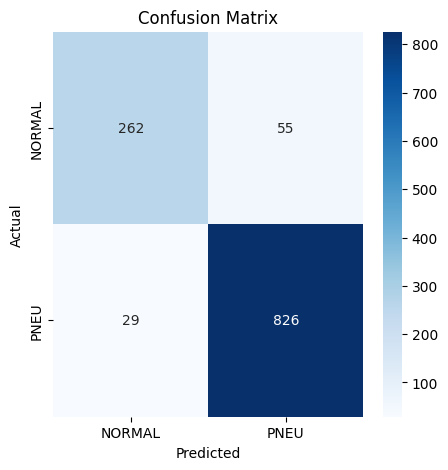

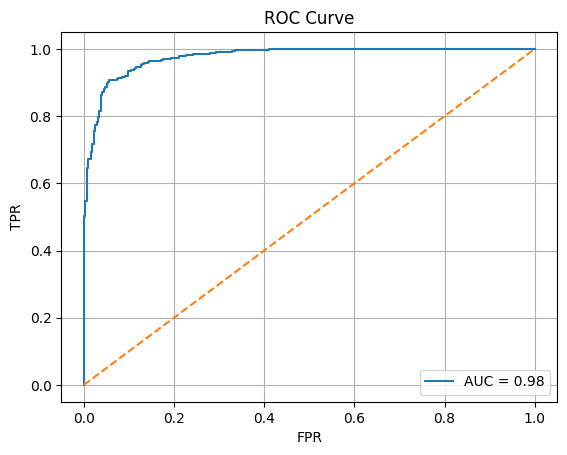

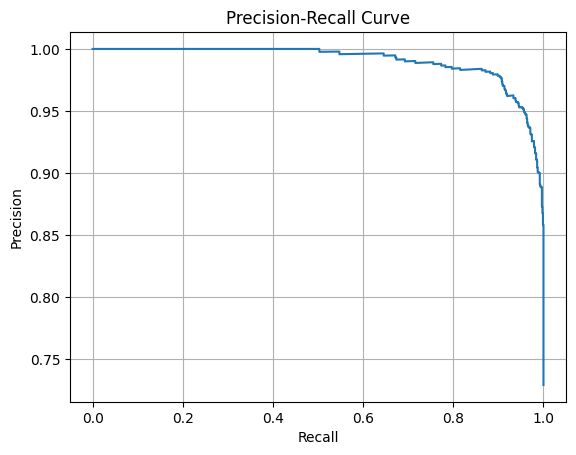

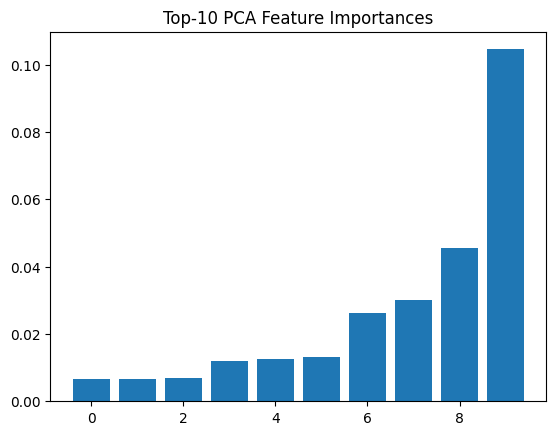

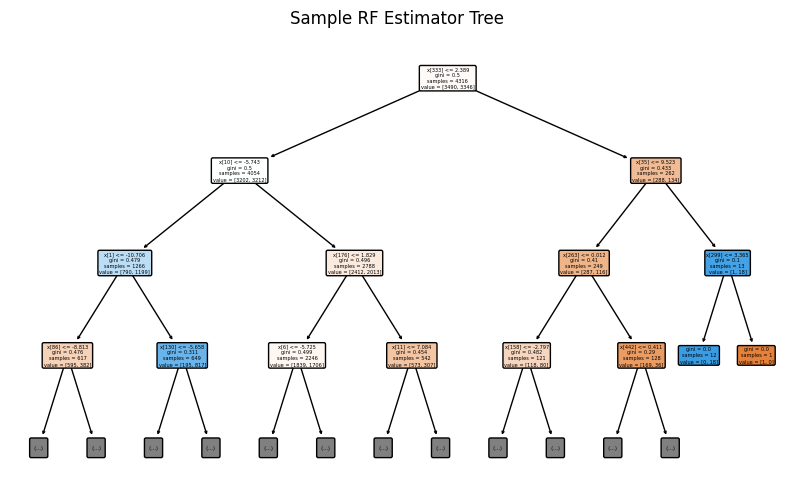

In [2]:
# 🩺 Random Forest + SMOTE on Kaggle Chest‑X‑ray Pneumonia Dataset
import os
import numpy as np
import random
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE  # ensure imbalanced-learn is installed

# ─── Configuration ─────────────────────────────────────────────
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'
SPLITS = ['train', 'val', 'test']
IMG_SIZE = (128, 128)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ─── Load Image Paths & Labels ────────────────────────────────
paths_labels = []
for split in SPLITS:
    for cls in ['NORMAL', 'PNEUMONIA']:
        folder = os.path.join(DATA_DIR, split, cls)
        for fname in os.listdir(folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                label = 0 if cls == 'NORMAL' else 1
                paths_labels.append((os.path.join(folder, fname), label))
random.shuffle(paths_labels)

# ─── Load & Preprocess Images ────────────────────────────────
def load_img(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype(np.float32) / 255.0
    return img.flatten()

X, y = [], []
print("📦 Loading images...")
for path, label in tqdm(paths_labels):
    try:
        X.append(load_img(path))
        y.append(label)
    except Exception:
        continue

X = np.array(X)
y = np.array(y)
print(f"✅ Loaded {X.shape[0]} samples ({np.bincount(y)})")

# ─── Split into Train/Test ────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

# ─── Standardization ───────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ─── PCA (retain 95% variance) ────────────────────────────────
pca = PCA(n_components=0.95, random_state=SEED)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"✅ PCA reduced to {X_train_pca.shape[1]} dimensions")

# ─── SMOTE oversampling ────────────────────────────────────────
smote = SMOTE(random_state=SEED)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pca, y_train)
print(f"✅ After SMOTE: {np.bincount(y_train_bal)}")

# ─── Hyperparameter Tuning (GridSearchCV) ─────────────────────
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=SEED)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)
best_rf = grid.best_estimator_
print(f"✅ Best params: {grid.best_params_}")

# ─── Evaluate on Test Set ─────────────────────────────────────
y_pred = best_rf.predict(X_test_pca)
y_prob = best_rf.predict_proba(X_test_pca)[:, 1]

print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🔁 F1 Score: {f1_score(y_test, y_pred, average='binary'):.4f}")
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=['NORMAL','PNEUMONIA']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ─── Visualizations ───────────────────────────────────────────
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL','PNEU'], yticklabels=['NORMAL','PNEU'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.legend(); plt.grid(True)
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure()
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.grid(True)
plt.show()

# Top 10 Feature Importances (PCA components)
imp = best_rf.feature_importances_
plt.figure()
plt.bar(range(10), np.sort(imp)[-10:])
plt.title("Top-10 PCA Feature Importances")
plt.show()

# Sample decision tree
plt.figure(figsize=(10,6))
plot_tree(best_rf.estimators_[0], max_depth=3, filled=True, rounded=True)
plt.title("Sample RF Estimator Tree")
plt.show()


Loading /kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL: 100%|██████████| 1341/1341 [00:34<00:00, 39.30it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA: 100%|██████████| 3875/3875 [00:47<00:00, 81.51it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL: 100%|██████████| 8/8 [00:00<00:00, 53.35it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA: 100%|██████████| 8/8 [00:00<00:00, 88.97it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL: 100%|██████████| 234/234 [00:04<00:00, 57.45it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA: 100%|██████████| 390/390 [00:04<00:00, 94.37it/s]


✅ Total dataset shape: X=(5856, 16384), y=(5856,)
📉 PCA reduced dimensions to: 617

🎯 Accuracy: 0.9514
🎯 F1 Score: 0.9671

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       317
           1       0.95      0.98      0.97       855

    accuracy                           0.95      1172
   macro avg       0.95      0.93      0.94      1172
weighted avg       0.95      0.95      0.95      1172


📊 Confusion Matrix:
[[277  40]
 [ 17 838]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


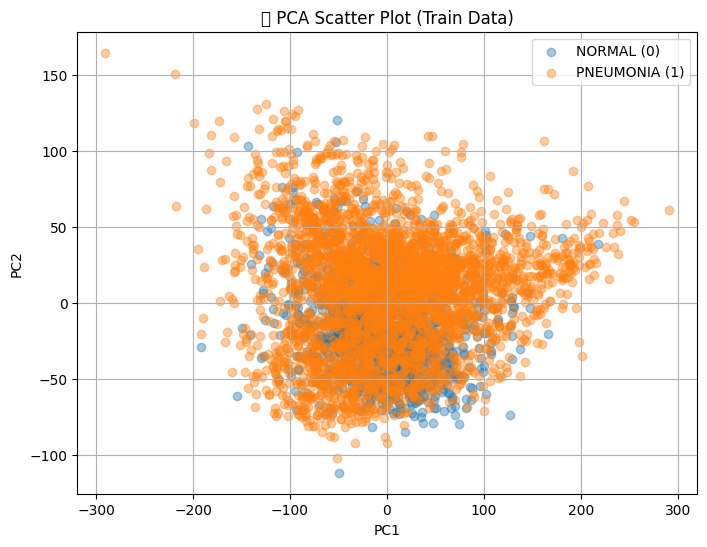

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


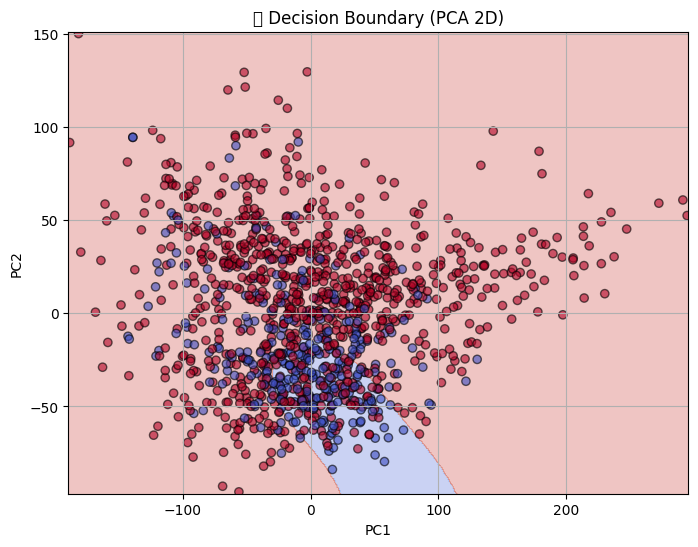


🖼️ Sample Predictions:


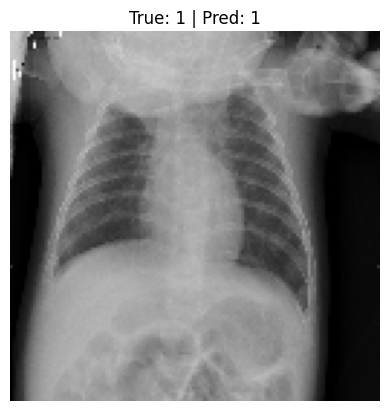

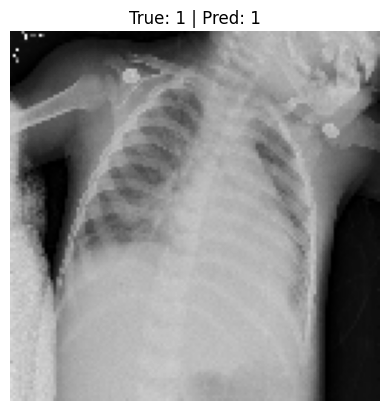

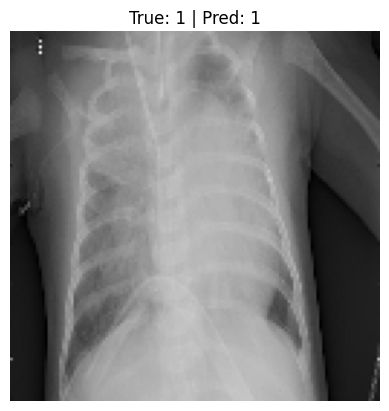

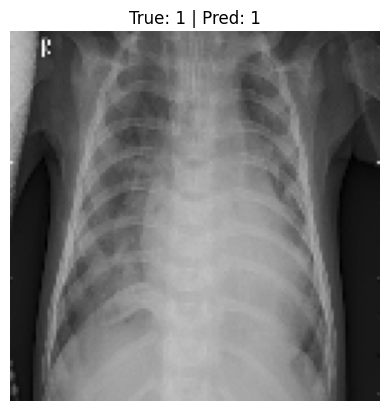

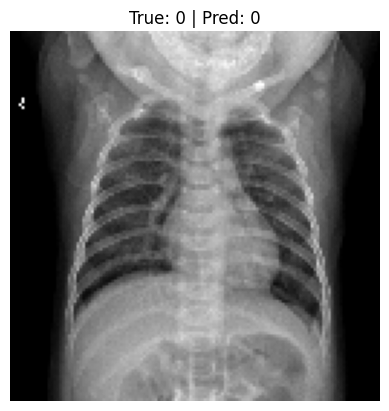

In [1]:
#svm
# 📦 Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# --- Configuration ---
BASE_PATH = '/kaggle/input/chest-xray-pneumonia/chest_xray'
IMG_SIZE = (128, 128)

# --- Load Images from Folder ---
def load_images_from_folder(folder_path, label):
    images, labels = [], []
    for filename in tqdm(os.listdir(folder_path), desc=f"Loading {folder_path}"):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                img = img.astype(np.float32) / 255.0
                images.append(img.flatten())
                labels.append(label)
    return images, labels

# --- Load Dataset ---
def load_dataset():
    X, y = [], []
    for split in ['train', 'val', 'test']:
        for category, label in [('NORMAL', 0), ('PNEUMONIA', 1)]:
            folder = os.path.join(BASE_PATH, split, category)
            imgs, lbls = load_images_from_folder(folder, label)
            X.extend(imgs)
            y.extend(lbls)
    return np.array(X), np.array(y)

# Load all data
X, y = load_dataset()
print(f"✅ Total dataset shape: X={X.shape}, y={y.shape}")

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# --- Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PCA ---
pca_model = PCA(n_components=0.95, svd_solver='full', random_state=42)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)
print(f"📉 PCA reduced dimensions to: {X_train_pca.shape[1]}")

# --- Train SVM ---
svm = SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_pca, y_train)

# --- Evaluate ---
y_pred = svm.predict(X_test_pca)
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
f1 = f1_score(y_test, y_pred)
print(f"🎯 F1 Score: {f1:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# --- PCA for 2D Visualization ---
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_train_scaled)
X_test_vis = pca_vis.transform(X_test_scaled)

# --- Scatter Plot ---
def plot_scatter(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], alpha=0.4, label='NORMAL (0)')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], alpha=0.4, label='PNEUMONIA (1)')
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_scatter(X_vis, y_train, "📊 PCA Scatter Plot (Train Data)")

# --- Decision Boundary ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Use small SVM for 2D decision boundary
svm_vis = SVC(kernel='rbf', C=2.0, gamma='scale', random_state=42)
svm_vis.fit(X_vis, y_train)
plot_decision_boundary(svm_vis, X_test_vis, y_test, "🌐 Decision Boundary (PCA 2D)")

# --- Show Sample Predictions ---
def show_predictions(X_raw, y_true, y_pred, count=5):
    for i in range(count):
        img = X_raw[i].reshape(128, 128)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {y_true[i]} | Pred: {y_pred[i]}")
        plt.axis('off')
        plt.show()

print("\n🖼️ Sample Predictions:")
show_predictions(X_test, y_test, y_pred, count=5)


100%|██████████| 3875/3875 [00:46<00:00, 82.47it/s]


Accuracy: 0.9358
F1 Score: 0.9583
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      0.78      0.86       268
   PNEUMONIA       0.93      0.99      0.96       776

    accuracy                           0.94      1044
   macro avg       0.95      0.88      0.91      1044
weighted avg       0.94      0.94      0.93      1044



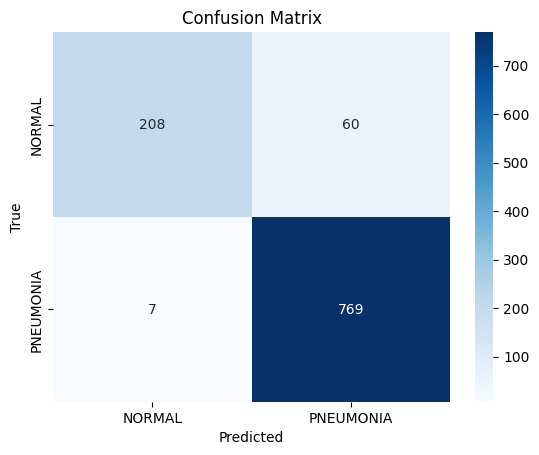

In [1]:
#knn
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
IMG_SIZE = (128, 128)
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder)):
        filepath = os.path.join(folder, filename)
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                img = img.astype(np.float32) / 255.0  # Normalize
                images.append(img.flatten())
                labels.append(label)
        except Exception as e:
            print(f"Could not read {filepath}: {e}")
    return images, labels

# --- Load images ---
X, y = [], []

for category, label in [('NORMAL', 0), ('PNEUMONIA', 1)]:
    folder = os.path.join(DATA_DIR, 'train', category)
    imgs, lbls = load_images_from_folder(folder, label)
    X.extend(imgs)
    y.extend(lbls)

# --- Convert to numpy ---
X = np.array(X)
y = np.array(y)

# --- Split into train and test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Standardize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Optional: PCA ---
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- KNN Classifier ---
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train_pca, y_train)

# --- Predict ---
y_pred = knn.predict(X_test_pca)

# --- Evaluation ---
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [1]:
#svm + resnet50
# 📦 Libraries
import os
import numpy as np
import cv2
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# --- Configuration ---
BASE_PATH = '/kaggle/input/chest-xray-pneumonia/chest_xray'
IMG_SIZE = 224  # ResNet default input size

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Dataset Loader ---
class PneumoniaDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.file_paths)
    
    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)  # convert grayscale to RGB 3 channels
        
        if self.transform:
            img = self.transform(img)
        
        label = self.labels[idx]
        return img, label

# --- Load Image Paths & Labels ---
def load_file_paths_and_labels(base_path):
    file_paths = []
    labels = []
    for split in ['train', 'val', 'test']:
        for category, label in [('NORMAL', 0), ('PNEUMONIA', 1)]:
            folder = os.path.join(base_path, split, category)
            for fname in os.listdir(folder):
                if fname.lower().endswith(('.jpeg', '.jpg', '.png')):
                    file_paths.append(os.path.join(folder, fname))
                    labels.append(label)
    return file_paths, labels

file_paths, labels = load_file_paths_and_labels(BASE_PATH)

# --- Train/Test Split ---
X_train_paths, X_test_paths, y_train, y_test = train_test_split(file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# --- Transforms ---
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet means
                         std=[0.229, 0.224, 0.225])
])

# --- Datasets and Loaders ---
train_dataset = PneumoniaDataset(X_train_paths, y_train, transform=transform)
test_dataset = PneumoniaDataset(X_test_paths, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# --- Load Pretrained ResNet50 ---
resnet = models.resnet50(pretrained=True,)
resnet = resnet.to(device)
resnet.eval()

# Remove final fully connected layer to get features
feature_extractor = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove last FC layer

# --- Extract Features ---
def extract_features(dataloader):
    features = []
    labels = []
    with torch.no_grad():
        for imgs, lbls in tqdm(dataloader, desc="Extracting Features"):
            imgs = imgs.to(device)
            feats = feature_extractor(imgs)  # output shape: (batch_size, 2048, 1, 1)
            feats = feats.view(feats.size(0), -1)  # flatten: (batch_size, 2048)
            features.append(feats.cpu().numpy())
            labels.extend(lbls.numpy())
    return np.vstack(features), np.array(labels)

X_train_feats, y_train = extract_features(train_loader)
X_test_feats, y_test = extract_features(test_loader)

print(f"Extracted train features shape: {X_train_feats.shape}")
print(f"Extracted test features shape: {X_test_feats.shape}")

# --- Standardize Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feats)
X_test_scaled = scaler.transform(X_test_feats)

# --- Train SVM ---
svm = SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# --- Evaluate ---
y_pred = svm.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n🎯 Accuracy: {acc:.4f}")
print(f"🎯 F1 Score: {f1:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 191MB/s]
Extracting Features: 100%|██████████| 37/37 [03:08<00:00,  5.10s/it]


Extracted train features shape: (4684, 2048)
Extracted test features shape: (1172, 2048)

🎯 Accuracy: 0.9718
🎯 F1 Score: 0.9808

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       317
           1       0.97      0.99      0.98       855

    accuracy                           0.97      1172
   macro avg       0.97      0.96      0.96      1172
weighted avg       0.97      0.97      0.97      1172


📊 Confusion Matrix:
[[294  23]
 [ 10 845]]


Loaded shapes: (5216, 16384) (5216,) (16, 16384) (16,) (624, 16384) (624,)
Best RF: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8155893536121673
F1: 0.8891428571428572
              precision    recall  f1-score   support

      NORMAL       0.96      0.30      0.45       271
   PNEUMONIA       0.80      1.00      0.89       781

    accuracy                           0.82      1052
   macro avg       0.88      0.65      0.67      1052
weighted avg       0.84      0.82      0.78      1052



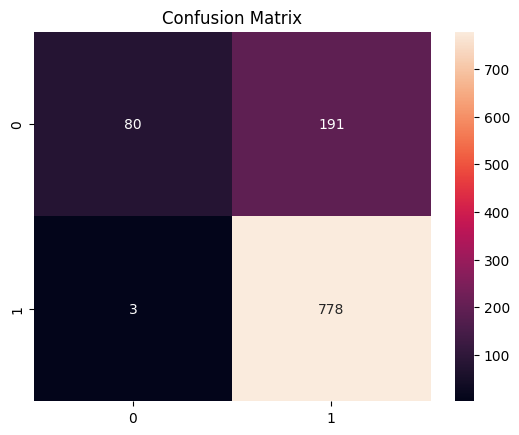

In [1]:
#rf
import os
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, precision_recall_curve
)

# ‑‑ Configuration ‑‑
IMG_SIZE = (128, 128)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# ‑‑ Load all images & labels
def load_images(split):
    X, y = [], []
    for label_name, label_val in [('NORMAL', 0), ('PNEUMONIA', 1)]:
        folder = os.path.join(DATA_DIR, split, label_name)
        for fname in os.listdir(folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                img = cv2.imread(os.path.join(folder, fname), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, IMG_SIZE)
                img = img.astype(np.float32) / 255.0
                X.append(img.flatten())
                y.append(label_val)
    return np.array(X), np.array(y)

X_train, y_train = load_images('train')
X_val, y_val = load_images('val')
X_test, y_test = load_images('test')
print("Loaded shapes:", X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

# ‑‑ Combine train + val, then split
X = np.concatenate([X_train, X_val])
y = np.concatenate([y_train, y_val])

X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_hold, y_hold, test_size=0.67, stratify=y_hold, random_state=SEED)

# ‑‑ Preprocessing
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

pca = PCA(n_components=0.95, random_state=SEED)
X_train_p = pca.fit_transform(X_train_s)
X_val_p = pca.transform(X_val_s)
X_test_p = pca.transform(X_test_s)

# ‑‑ Random Forest + HyperTune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier(random_state=SEED)
grid = GridSearchCV(rf, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train_p, y_train)
best = grid.best_estimator_
print("Best RF:", grid.best_params_)

# ‑‑ Final evaluation
y_pred = best.predict(X_test_p)
y_prob = best.predict_proba(X_test_p)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['NORMAL','PNEUMONIA']))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


📦 Loading images...


100%|██████████| 5856/5856 [01:16<00:00, 76.53it/s]



✅ Loaded: 5856 samples

✅ Accuracy: 0.8729
♻ F1 Score: 0.9189
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.94      0.56      0.71       317
   PNEUMONIA       0.86      0.99      0.92       855

    accuracy                           0.87      1172
   macro avg       0.90      0.78      0.81      1172
weighted avg       0.88      0.87      0.86      1172

Confusion Matrix:
 [[179 138]
 [ 11 844]]


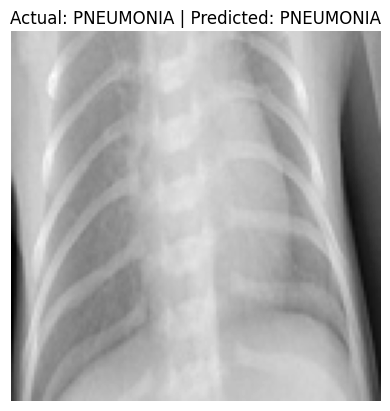

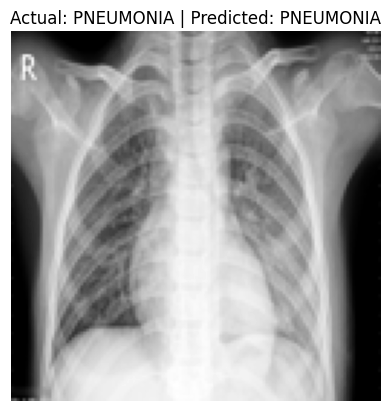

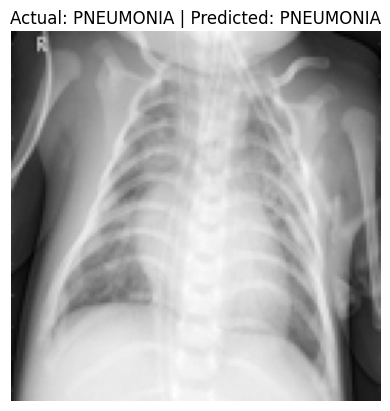

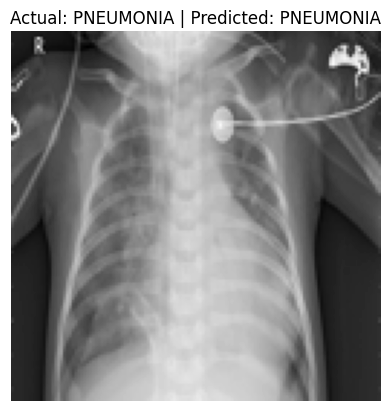

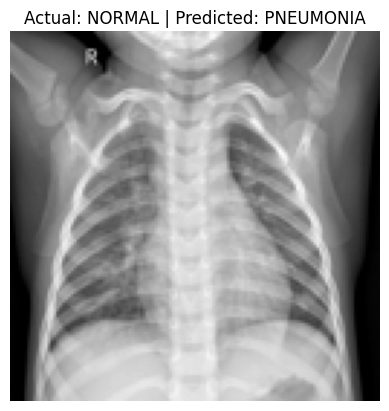

In [7]:
#rf
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)
import random
from PIL import Image

# --- Config ---
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'
IMG_SIZE = (128, 128)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# --- Load image paths & labels ---
def load_image_paths(base_dir):
    paths_labels = []
    for split in ['train', 'val', 'test']:
        for label in ['NORMAL', 'PNEUMONIA']:
            folder = os.path.join(base_dir, split, label)
            for fname in os.listdir(folder):
                fpath = os.path.join(folder, fname)
                if fpath.lower().endswith(('.jpg', '.jpeg', '.png')):
                    paths_labels.append((fpath, 0 if label == 'NORMAL' else 1))
    return paths_labels

data = load_image_paths(DATA_DIR)
random.shuffle(data)

# --- Load and preprocess image ---
def preprocess_image(path, size=IMG_SIZE):
    try:
        img = Image.open(path).convert('L')  # Grayscale
        img = img.resize(size)
        img_array = np.array(img).astype(np.float32)
        img_norm = (img_array - img_array.min()) / (img_array.ptp() + 1e-5)
        return img_norm.flatten()
    except Exception as e:
        print(f"Warning: {path} - {e}")
        return None

# --- Load images ---
X, y = [], []
print("📦 Loading images...")
for path, label in tqdm(data):
    vec = preprocess_image(path)
    if vec is not None:
        X.append(vec)
        y.append(label)

X = np.array(X)
y = np.array(y)
print(f"\n✅ Loaded: {X.shape[0]} samples")

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

# --- Standardize ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- PCA ---
pca = PCA(n_components=0.95, random_state=SEED)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --- Train Random Forest ---
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=SEED)
rf.fit(X_train_pca, y_train)

# --- Evaluate ---
y_pred = rf.predict(X_test_pca)
y_prob = rf.predict_proba(X_test_pca)[:, 1]

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"♻ F1 Score: {f1_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Visualization of some predictions ---
for i in range(5):
    img = X_test[i].reshape(IMG_SIZE)
    label = y_test[i]
    pred = y_pred[i]
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {'PNEUMONIA' if label else 'NORMAL'} | Predicted: {'PNEUMONIA' if pred else 'NORMAL'}")
    plt.axis('off')
    plt.show()


Loading /kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL: 100%|██████████| 1341/1341 [00:31<00:00, 42.74it/s]
Loading /kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA: 100%|██████████| 3875/3875 [00:40<00:00, 96.87it/s] 


✅ Accuracy: 0.9406
🎯 F1 Score: 0.9605

📋 Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.85      0.88       268
   PNEUMONIA       0.95      0.97      0.96       776

    accuracy                           0.94      1044
   macro avg       0.93      0.91      0.92      1044
weighted avg       0.94      0.94      0.94      1044



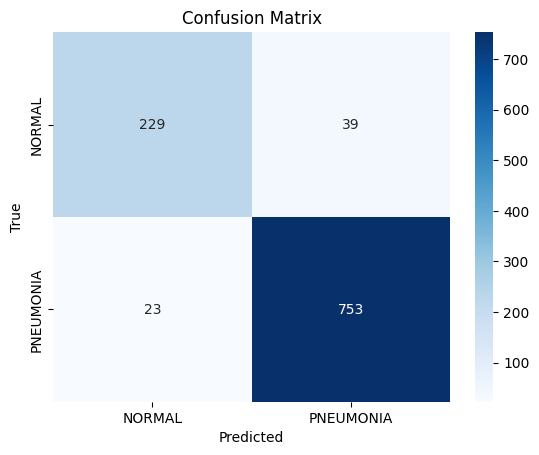

In [1]:
#knn + LDA
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Config ---
IMG_SIZE = (128, 128)
DATA_DIR = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# --- Load images ---
def load_images_from_folder(folder, label):
    images, labels = [], []
    for filename in tqdm(os.listdir(folder), desc=f"Loading {folder}"):
        filepath = os.path.join(folder, filename)
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, IMG_SIZE)
                img = img.astype(np.float32) / 255.0
                images.append(img.flatten())
                labels.append(label)
        except Exception as e:
            print(f"Could not read {filepath}: {e}")
    return images, labels

X, y = [], []

# Load data from 'train' folder (you can add 'val' and 'test' if desired)
for category, label in [('NORMAL', 0), ('PNEUMONIA', 1)]:
    folder = os.path.join(DATA_DIR, 'train', category)
    imgs, lbls = load_images_from_folder(folder, label)
    X.extend(imgs)
    y.extend(lbls)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Standardization ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- LDA instead of PCA ---
lda = LDA(n_components=1)  # Binary classification → max 1 component
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# --- KNN ---
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn.fit(X_train_lda, y_train)

# --- Predict ---
y_pred = knn.predict(X_test_lda)

# --- Evaluation ---
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"🎯 F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['NORMAL', 'PNEUMONIA']))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Loading PNEUMONIA: 100%|██████████| 390/390 [00:01<00:00, 236.59it/s]


Train shape: (5216, 16384), Val shape: (16, 16384), Test shape: (624, 16384)
PCA components to retain 95% variance: 629
Optimal threshold from ROC: 3946.3069

Accuracy: 0.6506
F1 Score: 0.7429

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.39      0.45       234
           1       0.69      0.81      0.74       390

    accuracy                           0.65       624
   macro avg       0.62      0.60      0.60       624
weighted avg       0.64      0.65      0.63       624



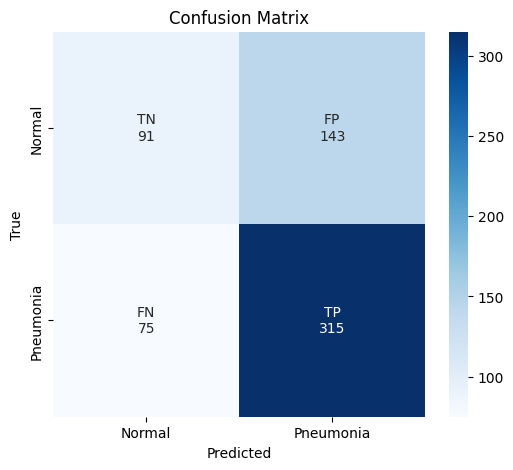

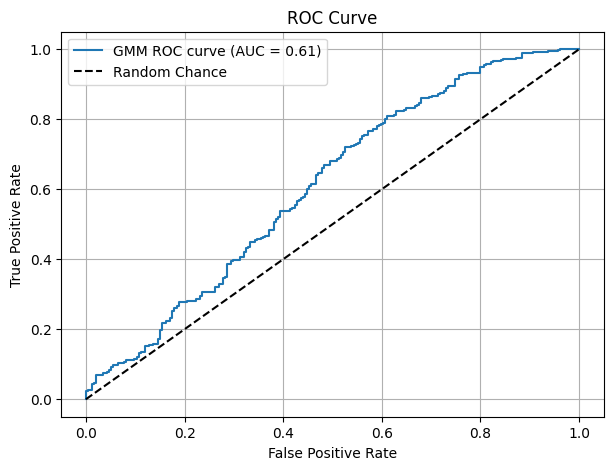

In [4]:
#GMM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score,
    roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# Base path to the chest-xray-pneumonia dataset folder
base_path = "/kaggle/input/chest-xray-pneumonia/chest_xray"

# Load images from a folder (normal or pneumonia)
def load_images_from_folder(folder_path, label, img_size=(128, 128), max_images=None):
    images, labels = [], []
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                   if f.lower().endswith(('.jpeg', '.jpg', '.png'))]
    if max_images:
        image_paths = image_paths[:max_images]
    
    for img_path in tqdm(image_paths, desc=f"Loading {os.path.basename(folder_path)}"):
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            img = img.astype(np.float32) / 255.0
            images.append(img.flatten())
            labels.append(label)
        except:
            continue
    return images, labels

# Load train, val, test sets for normal and pneumonia
def load_dataset(base_path, split):
    normal_folder = os.path.join(base_path, split, "NORMAL")
    pneumonia_folder = os.path.join(base_path, split, "PNEUMONIA")
    
    normal_images, normal_labels = load_images_from_folder(normal_folder, 0)
    pneumonia_images, pneumonia_labels = load_images_from_folder(pneumonia_folder, 1)
    
    X = np.array(normal_images + pneumonia_images)
    y = np.array(normal_labels + pneumonia_labels)
    return X, y

# Load training and test data
X_train, y_train = load_dataset(base_path, "train")
X_val, y_val = load_dataset(base_path, "val")
X_test, y_test = load_dataset(base_path, "test")

print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# PCA for 95% variance
pca_full = PCA(n_components=0.95, svd_solver='full', random_state=42)
pca_full.fit(X_train_scaled)
n_components = pca_full.n_components_
print(f"PCA components to retain 95% variance: {n_components}")

pca = PCA(n_components=n_components, svd_solver='randomized', random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train separate GMM for Normal and Pneumonia
gmm_normal = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_normal.fit(X_train_pca[y_train == 0])

gmm_pneumonia = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_pneumonia.fit(X_train_pca[y_train == 1])

# Predict test set using log likelihoods
log_likelihood_normal = gmm_normal.score_samples(X_test_pca)
log_likelihood_pneumonia = gmm_pneumonia.score_samples(X_test_pca)

# Score difference for classification
scores = log_likelihood_pneumonia - log_likelihood_normal

# Find optimal threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold from ROC: {optimal_threshold:.4f}")

# Final prediction
y_pred = (scores > optimal_threshold).astype(int)

# Evaluate results
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = [f"{value}" for value in cm.flatten()]
labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve & AUC visualization
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'GMM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
